In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## 1. a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

df = pd.read_csv(r"C:\Users\mynan\Desktop\python project\\bank_marketing_updated_v1.csv")
df

    

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan    contact  day      month  \
0          yes      no     yes   no    unknown    5  may, 2017   
1          yes      no     yes   no    unknown    5  may, 2017   
2          yes      no     yes  yes    unknown    5  may, 2017   
3           no      no     yes   no    unknown    5  may, 2017   
4           no      no      no   no    unknown    5  may, 2017   
...        ...     ...     ...  ...        ...  ...        ...   
45206      yes      no      no   no   cellular   17  nov, 2017   
45207      yes      no      no   no   cellular   17  nov, 2017   
45208      yes      no      no   no   cellular   17  nov, 2017   
45209      yes      no      no   no  telephone   17  nov, 2017   
45210      yes      no      no   no   cellular   17  nov, 2017   

                   duration  campaign  pdays  previous poutcome response  
0                   261 sec         1     -1         0  unknown       no  
1                   151 sec         1     -1         0  unknown       no  
2                    76 sec         1     -1         0  unknown       no  
3                    92 sec         1     -1         0  unknown       no  
4                   198 sec         1     -1         0  unknown       no  
...                     ...       ...    ...       ...      ...      ...  
45206  16.2833333333333 min         3     -1         0  unknown      yes  
45207               7.6 min         2     -1         0  unknown      yes  
45208  18.7833333333333 min         5    184         3  success      yes  
45209  8.46666666666667 min         4     -1         0  unknown       no  
45210  6.01666666666667 min         2    188        11    other       no  

[45211 rows x 19 columns]

In [4]:
df.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [7]:
## 1.b) Inspect for any instances of missing values, outliers, or data inconsistencies.
## finding missing values
df.isna().sum()


customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

<Axes: xlabel='age'>

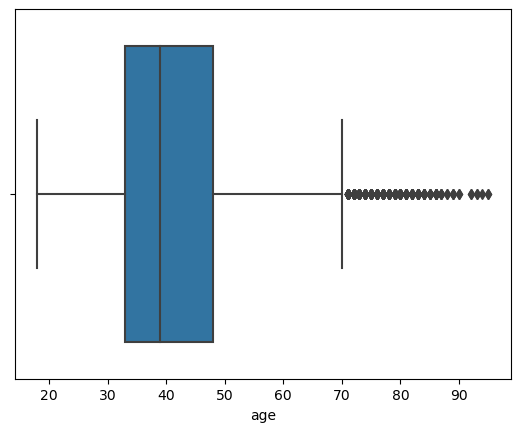

In [8]:
### finding outliers for age column
sns.boxplot(x=df.age)

In [9]:
df["age"].value_counts()

age
32.0    2085
31.0    1994
33.0    1972
34.0    1929
35.0    1892
        ... 
93.0       2
90.0       2
95.0       2
88.0       2
94.0       1
Name: count, Length: 77, dtype: int64

In [24]:
mode_value = df["age"].mode()
print("Mode:", mode_value)

Mode: 0    32.0
Name: age, dtype: float64


In [26]:
df["age"]=df["age"].fillna(df["age"]).mode()[0]
df["response"]=df["response"].fillna(df["response"]).mode()[0]
df["month"]=df["month"].fillna(df["month"]).mode()[0]

In [27]:
df.isna().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

In [16]:
                  #### descriptive statistics######
## 2. a) Derive summary statistics (mean, median, standard deviation) for relevant columns.
## finding mean, median and standard deviation for age column
df["age"].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [17]:
## finding mean, median and standard deviation for salary column
df["salary"].describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [18]:
## finding mean, median and standard deviation for balance column
df["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [19]:
## finding mean, median and standard deviation for day column
df["day"].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [20]:
## finding mean, median and standard deviation for campaign column
df["campaign"].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [21]:
## finding mean, median and standard deviation for pdays column
df["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [22]:
## finding mean, median and standard deviation for previous column
df["previous"].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

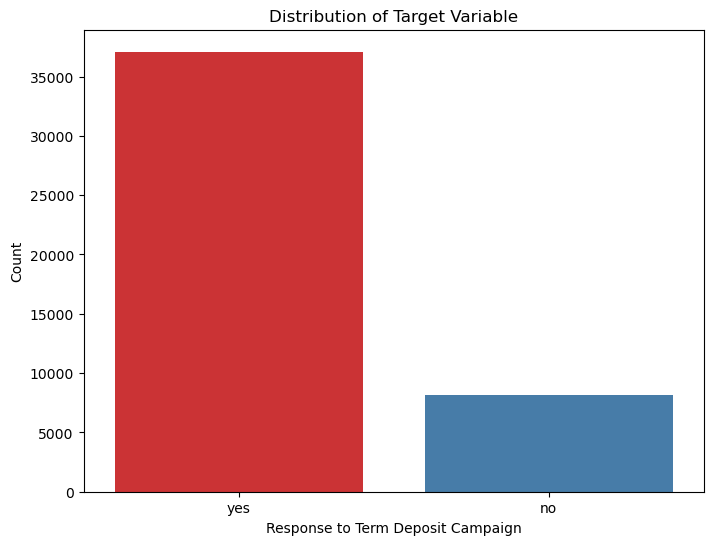

In [28]:
## 2.b) Examine the distribution of the target variable, indicating responses to the term deposit campaign
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='targeted', palette='Set1')
plt.xlabel('Response to Term Deposit Campaign')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [30]:
df['duration'] = df['duration'].str.replace(' sec', '')
df['duration'] = df['duration'].str.replace(' min', '')

In [31]:
df

customerid   age  salary  balance   marital                  jobedu  \
0               1  32.0  100000     2143   married     management,tertiary   
1               2  32.0   60000       29    single    technician,secondary   
2               3  32.0  120000        2   married  entrepreneur,secondary   
3               4  32.0   20000     1506   married     blue-collar,unknown   
4               5  32.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  32.0   60000      825   married     technician,tertiary   
45207       45208  32.0   55000     1729  divorced         retired,primary   
45208       45209  32.0   55000     5715   married       retired,secondary   
45209       45210  32.0   20000      668   married   blue-collar,secondary   
45210       45211  32.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan    contact  day      month  \
0          yes      no     yes   no    unknown    5  may, 2017   
1          yes      no     yes   no    unknown    5  may, 2017   
2          yes      no     yes  yes    unknown    5  may, 2017   
3           no      no     yes   no    unknown    5  may, 2017   
4           no      no      no   no    unknown    5  may, 2017   
...        ...     ...     ...  ...        ...  ...        ...   
45206      yes      no      no   no   cellular   17  may, 2017   
45207      yes      no      no   no   cellular   17  may, 2017   
45208      yes      no      no   no   cellular   17  may, 2017   
45209      yes      no      no   no  telephone   17  may, 2017   
45210      yes      no      no   no   cellular   17  may, 2017   

               duration  campaign  pdays  previous poutcome response  
0                   261         1     -1         0  unknown       no  
1                   151         1     -1         0  unknown       no  
2                    76         1     -1         0  unknown       no  
3                    92         1     -1         0  unknown       no  
4                   198         1     -1         0  unknown       no  
...                 ...       ...    ...       ...      ...      ...  
45206  16.2833333333333         3     -1         0  unknown       no  
45207               7.6         2     -1         0  unknown       no  
45208  18.7833333333333         5    184         3  success       no  
45209  8.46666666666667         4     -1         0  unknown       no  
45210  6.01666666666667         2    188        11    other       no  

[45211 rows x 19 columns]

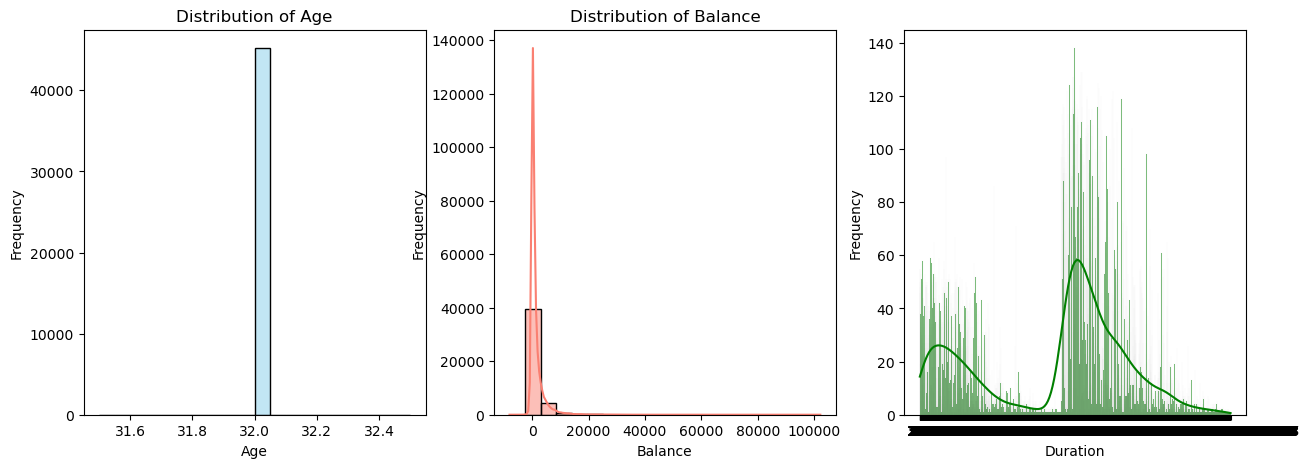

<Figure size 1500x500 with 0 Axes>

In [39]:
                                        ####### univairate analysis ##########
## 3.a) Examine the distribution of individual key features, such as age, balance, and call duration.

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['balance'], bins=20, kde=True, color='salmon')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')

plt.subplot(1, 3, 3)
sns.histplot(df['duration'], bins=20, kde=True, color='green')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.figure(figsize=(15, 5))

plt.tight_layout()
plt.show()

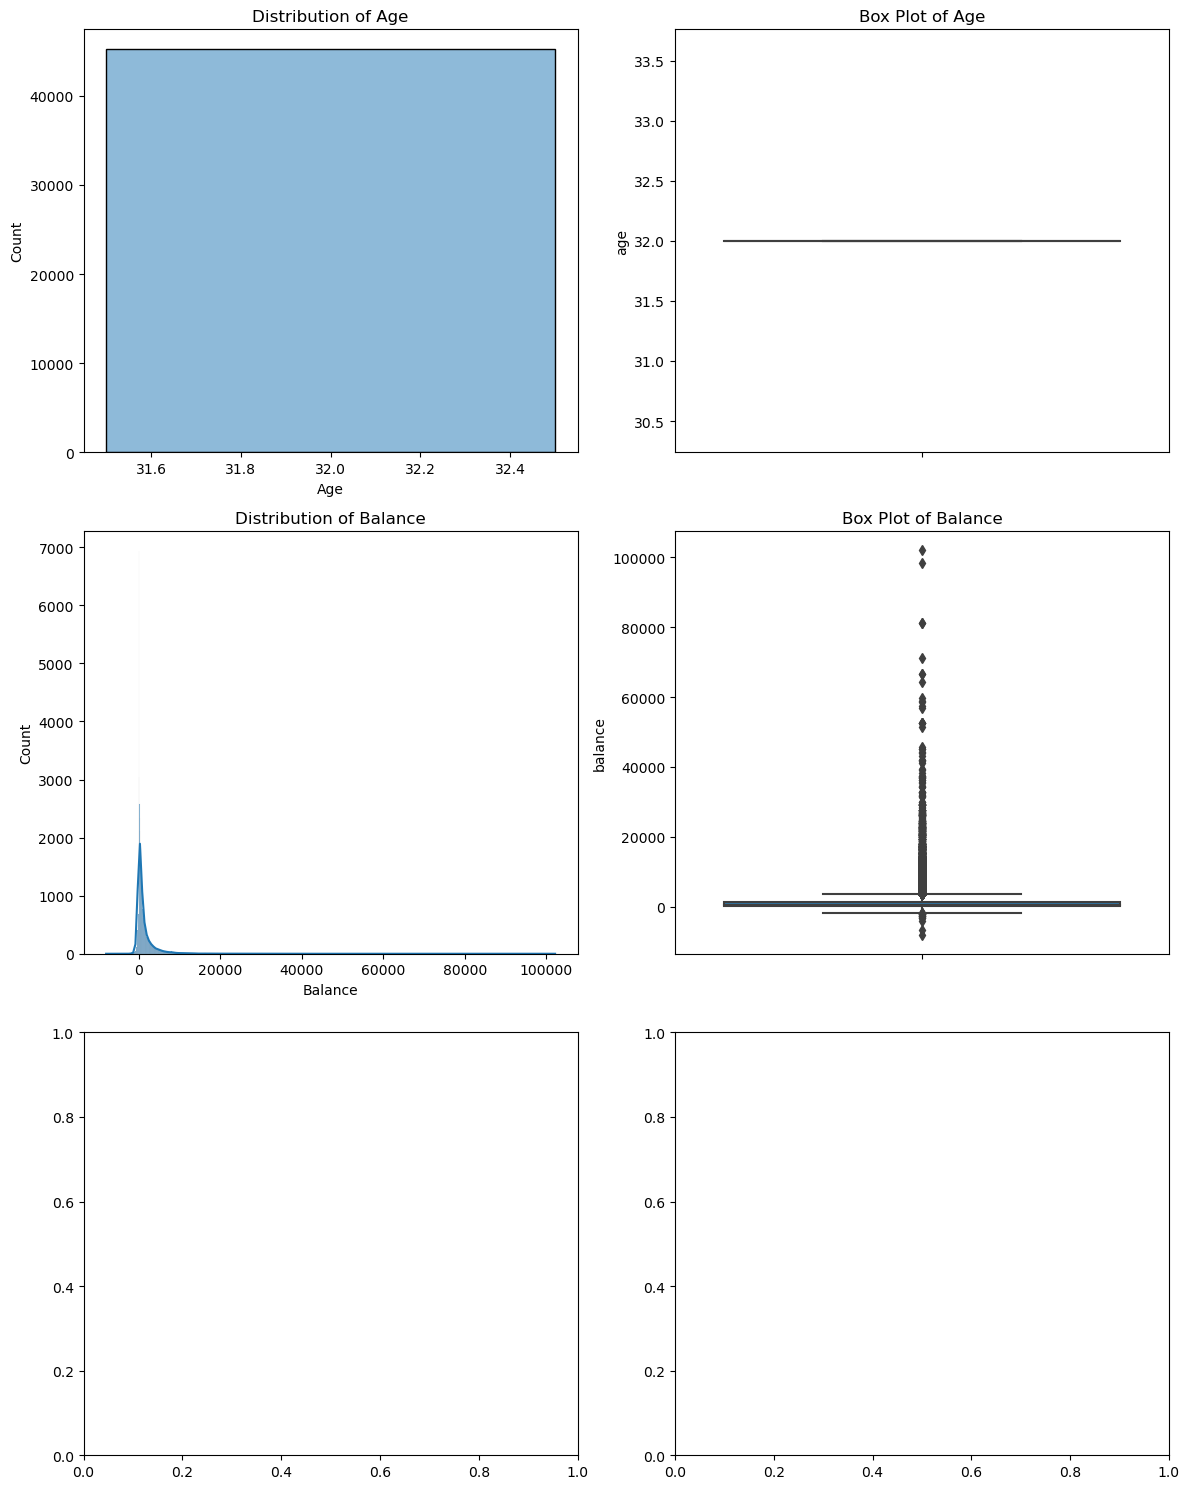

In [42]:
## 3.b)  Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.
# Assuming df is your DataFrame with columns 'age', 'balance', and 'call_duration'

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Age
sns.histplot(df['age'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')

sns.boxplot(y=df['age'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Age')

# Balance
sns.histplot(df['balance'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Balance')
axes[1, 0].set_xlabel('Balance')

sns.boxplot(y=df['balance'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Balance')



plt.tight_layout()
plt.show()


In [43]:
           ###### bivariate analysis ######
## 4. a) Evaluate the relationship between independent variables and the target variable.


In [62]:
### split the jobedu column ###
split_jobedu = df['jobedu'].str.split(',', n=1, expand=True).rename(columns={0:"job_type", 1:"education"})
split_jobedu

job_type  education
0        management   tertiary
1        technician  secondary
2      entrepreneur  secondary
3       blue-collar    unknown
4           unknown    unknown
...             ...        ...
45206    technician   tertiary
45207       retired    primary
45208       retired  secondary
45209   blue-collar  secondary
45210  entrepreneur  secondary

[45211 rows x 2 columns]

In [63]:
df[['job_type', 'edcation']] = df['jobedu'].str.split(',', n=1, expand=True)
df

customerid  age  salary  balance   marital                  jobedu  \
0               1   32  100000     2143   married     management,tertiary   
1               2   32   60000       29    single    technician,secondary   
2               3   32  120000        2   married  entrepreneur,secondary   
3               4   32   20000     1506   married     blue-collar,unknown   
4               5   32       0        1    single         unknown,unknown   
...           ...  ...     ...      ...       ...                     ...   
45206       45207   32   60000      825   married     technician,tertiary   
45207       45208   32   55000     1729  divorced         retired,primary   
45208       45209   32   55000     5715   married       retired,secondary   
45209       45210   32   20000      668   married   blue-collar,secondary   
45210       45211   32  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan  ...          duration  campaign pdays  \
0          yes      no     yes   no  ...               261         1    -1   
1          yes      no     yes   no  ...               151         1    -1   
2          yes      no     yes  yes  ...                76         1    -1   
3           no      no     yes   no  ...                92         1    -1   
4           no      no      no   no  ...               198         1    -1   
...        ...     ...     ...  ...  ...               ...       ...   ...   
45206      yes      no      no   no  ...  16.2833333333333         3    -1   
45207      yes      no      no   no  ...               7.6         2    -1   
45208      yes      no      no   no  ...  18.7833333333333         5   184   
45209      yes      no      no   no  ...  8.46666666666667         4    -1   
45210      yes      no      no   no  ...  6.01666666666667         2   188   

      previous  poutcome  response  age_group income_category      job_type  \
0            0   unknown        no      30-39            >80k    management   
1            0   unknown        no      30-39         60k-80k    technician   
2            0   unknown        no      30-39            >80k  entrepreneur   
3            0   unknown        no      30-39         20k-40k   blue-collar   
4            0   unknown        no      30-39            <20k       unknown   
...        ...       ...       ...        ...             ...           ...   
45206        0   unknown        no      30-39         60k-80k    technician   
45207        0   unknown        no      30-39         40k-60k       retired   
45208        3   success        no      30-39         40k-60k       retired   
45209        0   unknown        no      30-39         20k-40k   blue-collar   
45210       11     other        no      30-39            >80k  entrepreneur   

        edcation  
0       tertiary  
1      secondary  
2      secondary  
3        unknown  
4        unknown  
...          ...  
45206   tertiary  
45207    primary  
45208  secondary  
45209  secondary  
45210  secondary  

[45211 rows x 23 columns]

In [65]:


# Dropping a column
column_to_drop = 'jobedu'
df = df.drop(columns=column_to_drop)

# Displaying the DataFrame after dropping the column
print("\nDataFrame after dropping column '{}':".format(column_to_drop))
print(df)



DataFrame after dropping column 'jobedu':
       customerid  age  salary  balance   marital targeted default housing  \
0               1   32  100000     2143   married      yes      no     yes   
1               2   32   60000       29    single      yes      no     yes   
2               3   32  120000        2   married      yes      no     yes   
3               4   32   20000     1506   married       no      no     yes   
4               5   32       0        1    single       no      no      no   
...           ...  ...     ...      ...       ...      ...     ...     ...   
45206       45207   32   60000      825   married      yes      no      no   
45207       45208   32   55000     1729  divorced      yes      no      no   
45208       45209   32   55000     5715   married      yes      no      no   
45209       45210   32   20000      668   married      yes      no      no   
45210       45211   32  120000     2971   married      yes      no      no   

      loan    contac

In [66]:
df

customerid  age  salary  balance   marital targeted default housing  \
0               1   32  100000     2143   married      yes      no     yes   
1               2   32   60000       29    single      yes      no     yes   
2               3   32  120000        2   married      yes      no     yes   
3               4   32   20000     1506   married       no      no     yes   
4               5   32       0        1    single       no      no      no   
...           ...  ...     ...      ...       ...      ...     ...     ...   
45206       45207   32   60000      825   married      yes      no      no   
45207       45208   32   55000     1729  divorced      yes      no      no   
45208       45209   32   55000     5715   married      yes      no      no   
45209       45210   32   20000      668   married      yes      no      no   
45210       45211   32  120000     2971   married      yes      no      no   

      loan    contact  ...          duration campaign pdays  previous  \
0       no    unknown  ...               261        1    -1         0   
1       no    unknown  ...               151        1    -1         0   
2      yes    unknown  ...                76        1    -1         0   
3       no    unknown  ...                92        1    -1         0   
4       no    unknown  ...               198        1    -1         0   
...    ...        ...  ...               ...      ...   ...       ...   
45206   no   cellular  ...  16.2833333333333        3    -1         0   
45207   no   cellular  ...               7.6        2    -1         0   
45208   no   cellular  ...  18.7833333333333        5   184         3   
45209   no  telephone  ...  8.46666666666667        4    -1         0   
45210   no   cellular  ...  6.01666666666667        2   188        11   

       poutcome  response age_group income_category      job_type   edcation  
0       unknown        no     30-39            >80k    management   tertiary  
1       unknown        no     30-39         60k-80k    technician  secondary  
2       unknown        no     30-39            >80k  entrepreneur  secondary  
3       unknown        no     30-39         20k-40k   blue-collar    unknown  
4       unknown        no     30-39            <20k       unknown    unknown  
...         ...       ...       ...             ...           ...        ...  
45206   unknown        no     30-39         60k-80k    technician   tertiary  
45207   unknown        no     30-39         40k-60k       retired    primary  
45208   success        no     30-39         40k-60k       retired  secondary  
45209   unknown        no     30-39         20k-40k   blue-collar  secondary  
45210     other        no     30-39            >80k  entrepreneur  secondary  

[45211 rows x 22 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


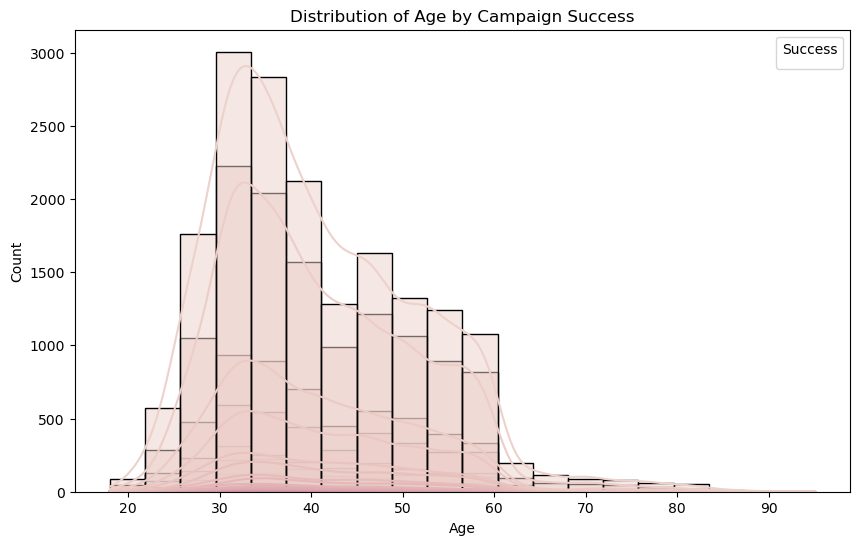

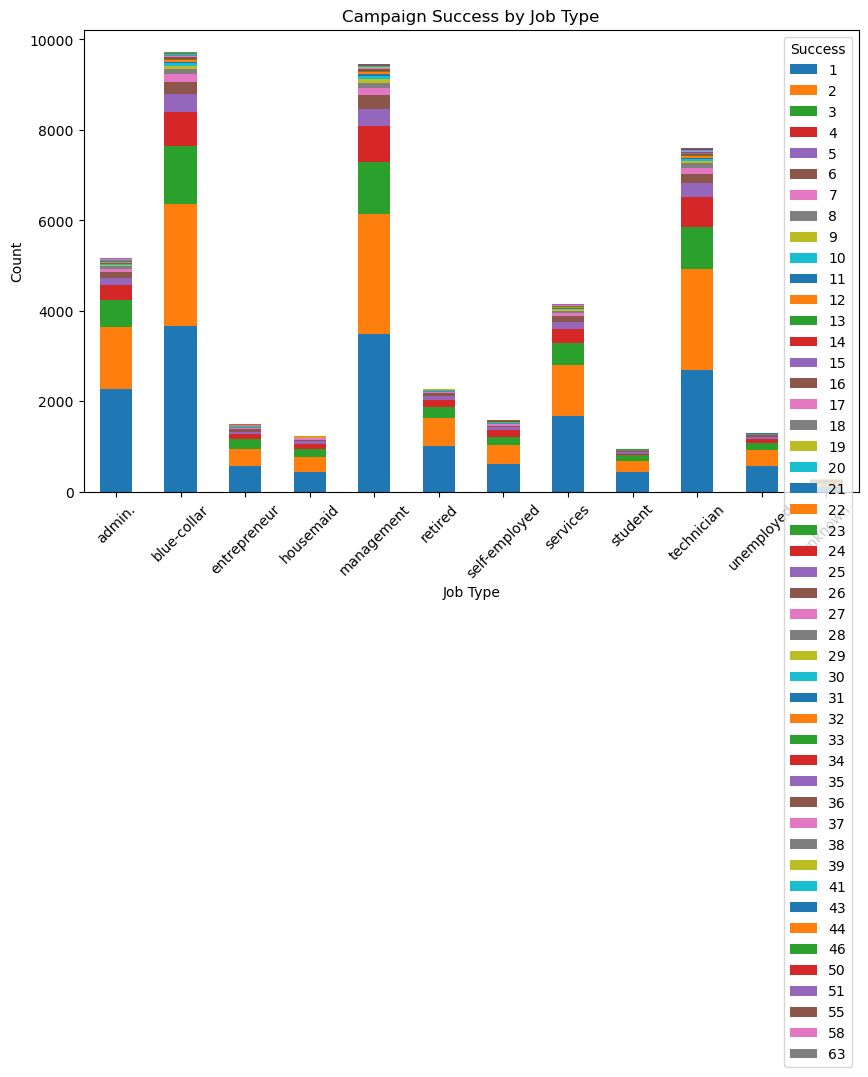

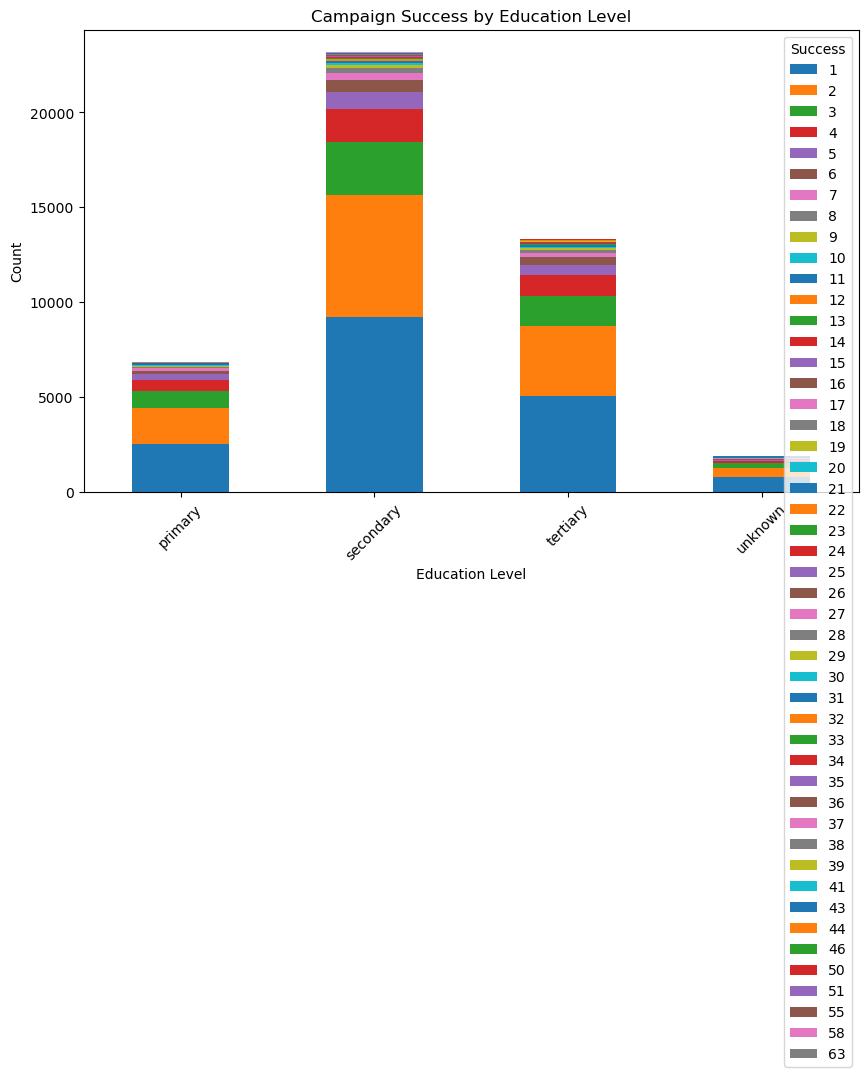

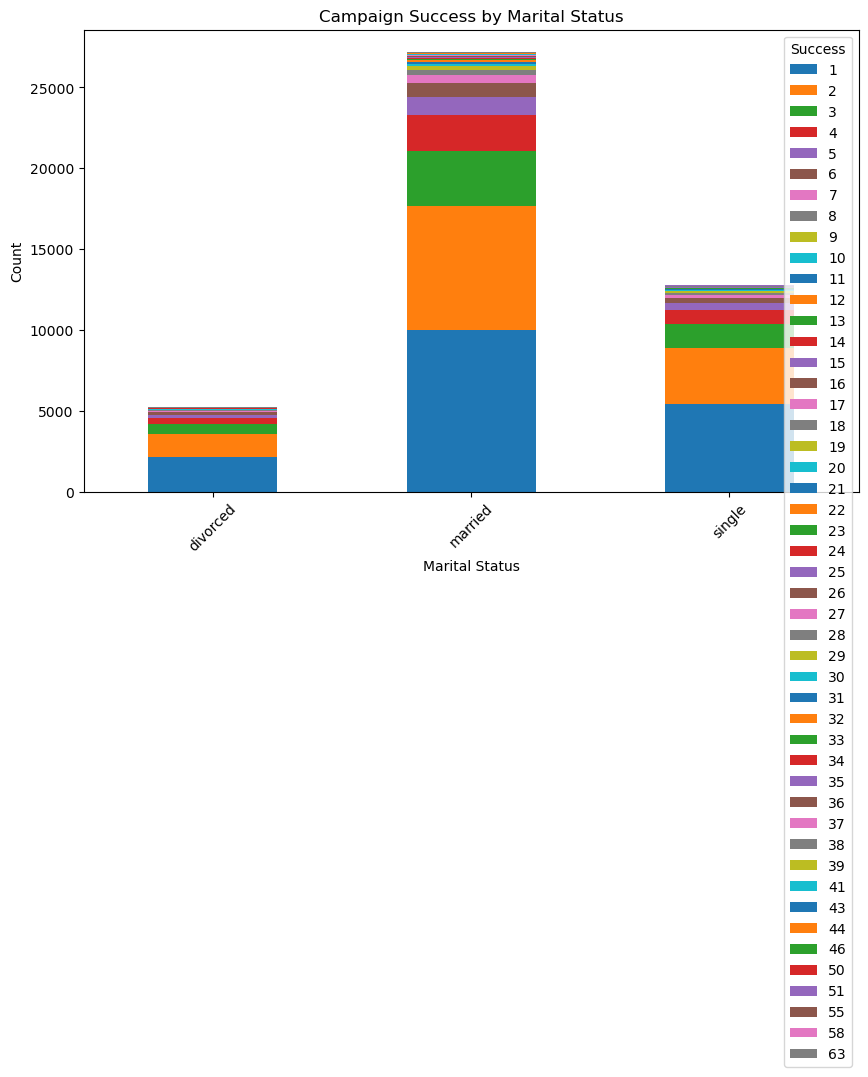

ValueError: could not convert string to float: 'married'

<Figure size 1000x600 with 0 Axes>

In [31]:
### 4. b) Analyze how features like age, job type, education, marital status, etc.,associate with the success of the 
##term deposit campaign, using visualizations like bar charts, stacked bar charts, and heatmaps.



# Analyzing age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='campaign', bins=20, kde=True)
plt.title('Distribution of Age by Campaign Success')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right')
plt.show()

# Stacked bar chart for job type
job_success_counts = df.groupby(['job_type', 'campaign']).size().unstack()
job_success_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Campaign Success by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Stacked bar chart for education
edu_success_counts = df.groupby(['edcation', 'campaign']).size().unstack()
edu_success_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Campaign Success by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Stacked bar chart for marital status
marital_success_counts = df.groupby(['marital', 'campaign']).size().unstack()
marital_success_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Campaign Success by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Heatmap for correlation between features and success
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['campaign']], annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Features and Campaign Success')
plt.show()


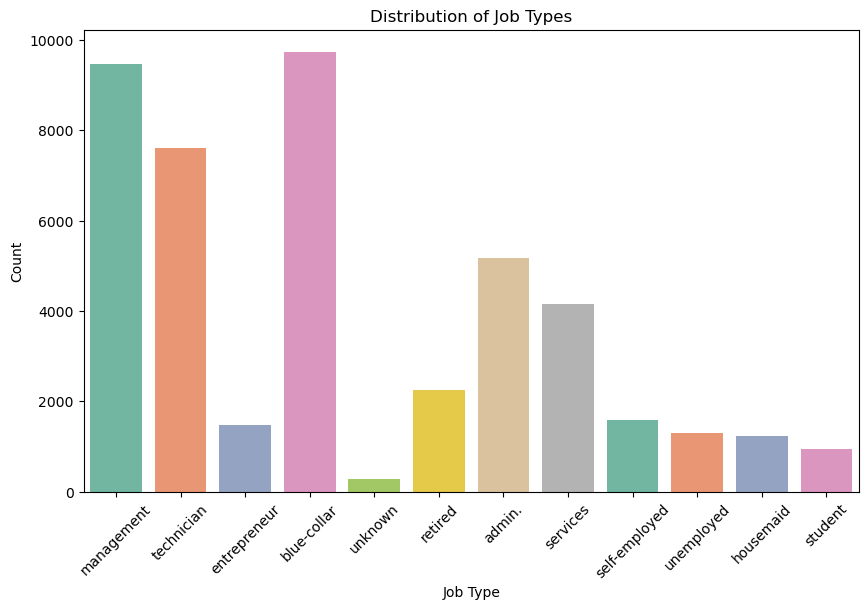

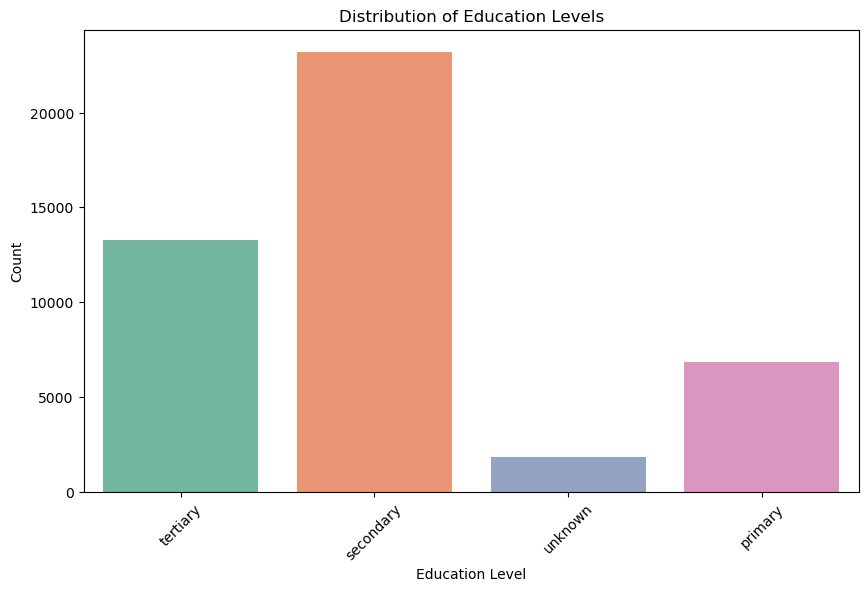

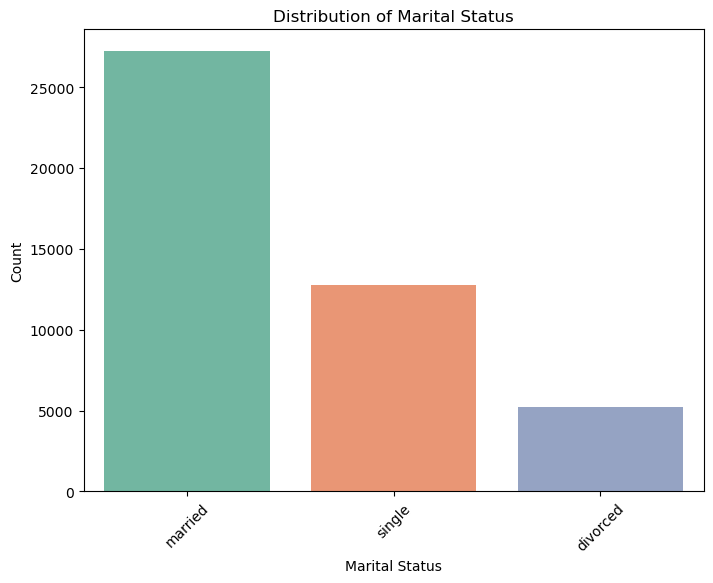

In [32]:
                     ### Categorical Variables Analysis #####


### 5.a) Investigate the distribution of categorical variables such as job type, education, and marital status.
# Plotting the distribution of categorical variables

# Distribution of Job Type
plt.figure(figsize=(10, 6))
sns.countplot(x='job_type', data=df, palette='Set2')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Education
plt.figure(figsize=(10, 6))
sns.countplot(x='edcation', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=df, palette='Set2')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


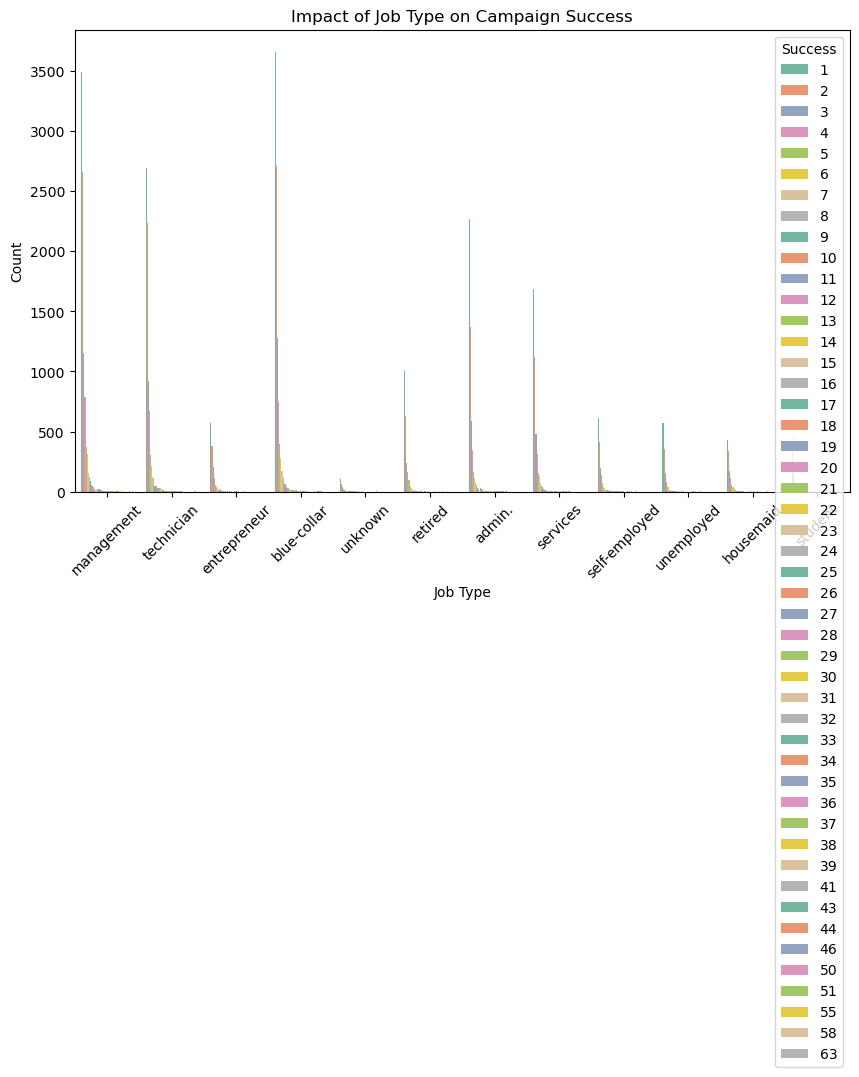

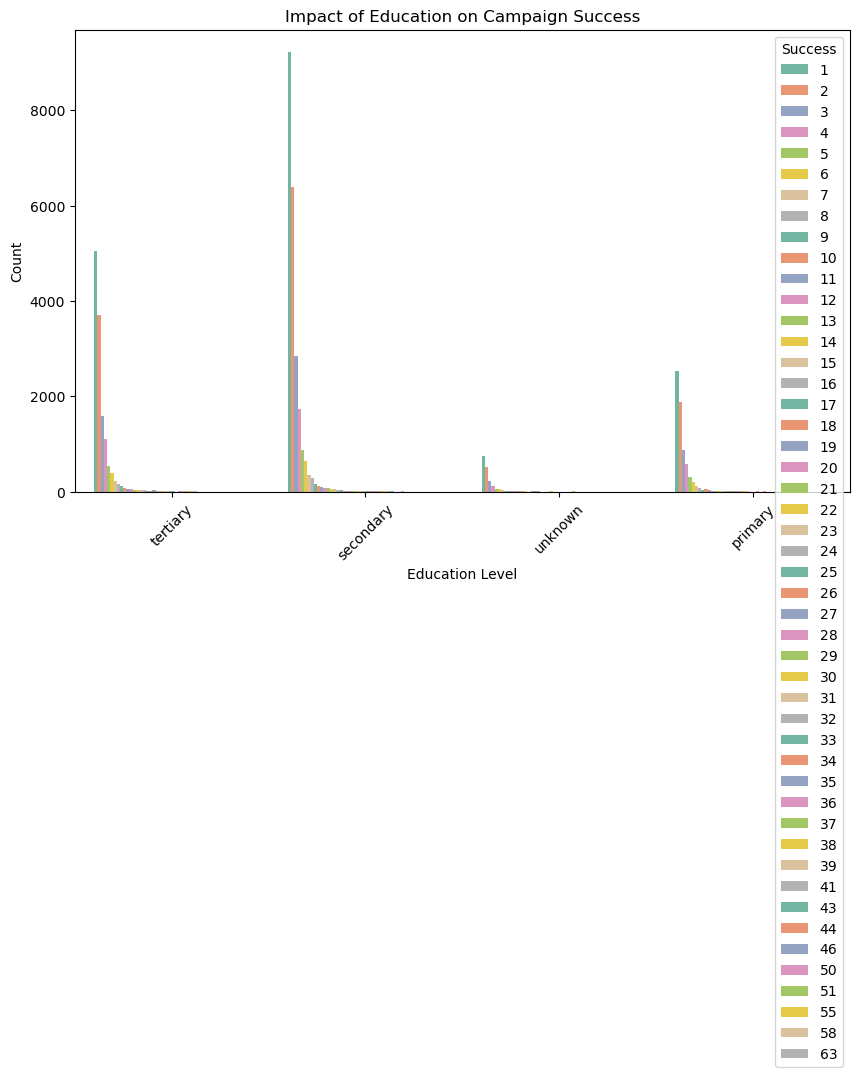

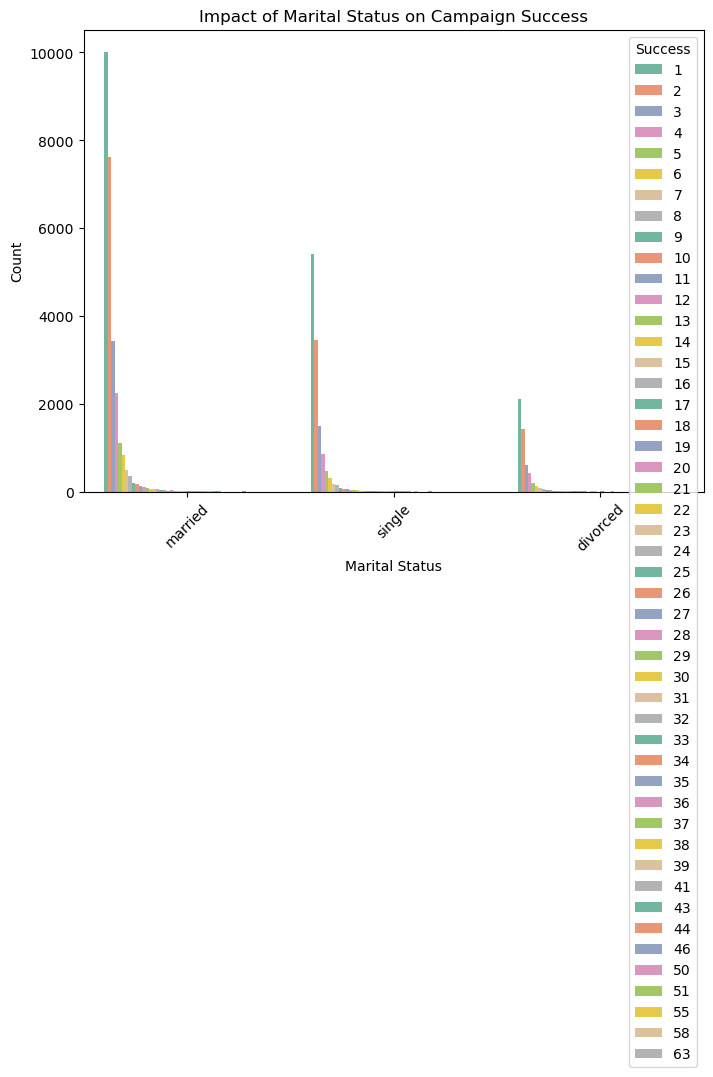

In [34]:
## 5. b) Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.


# Plotting the impact of categorical variables on campaign success

# Impact of Job Type
plt.figure(figsize=(10, 6))
sns.countplot(x='job_type', hue='campaign', data=df, palette='Set2')
plt.title('Impact of Job Type on Campaign Success')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success', loc='upper right')
plt.show()

# Impact of Education
plt.figure(figsize=(10, 6))
sns.countplot(x='edcation', hue='campaign', data=df, palette='Set2')
plt.title('Impact of Education on Campaign Success')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success', loc='upper right')
plt.show()

# Impact of Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='campaign', data=df, palette='Set2')
plt.title('Impact of Marital Status on Campaign Success')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success', loc='upper right')
plt.show()


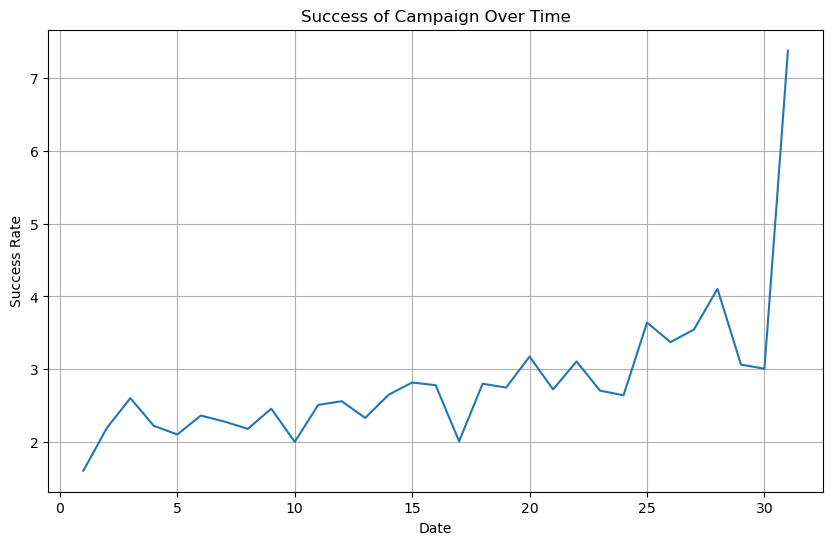

In [46]:
                                    #######Temporal Analysis
## 6.a)  Investigate temporal patterns in the success of the campaign over time.
success_rate = df.groupby('day')['campaign'].mean()

# Plot the success rate over time
plt.figure(figsize=(10, 6))
success_rate.plot()
plt.xlabel('Date')
plt.ylabel('Success Rate')
plt.title('Success of Campaign Over Time')
plt.grid(True)
plt.show()

In [50]:
### 6 b) Analyze if specific months or days exhibit superior campaign performance.

# Aggregate performance metrics by day of the week
daily_performance = df.groupby('day')['campaign'].mean()


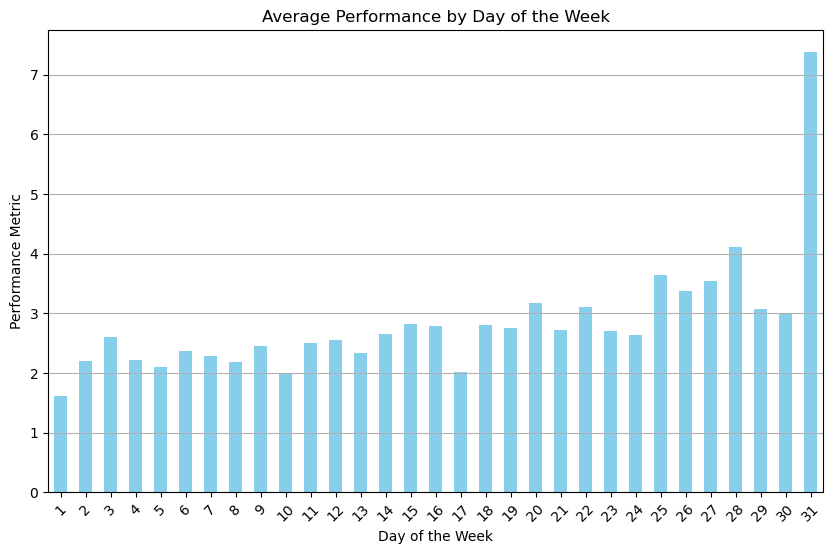

In [51]:

plt.figure(figsize=(10, 6))
daily_performance.plot(kind='bar', color='skyblue')
plt.title('Average Performance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [67]:
                                  ######Feature Engineering
#### 7.a) Introduce new features that may enhance prediction, such as creating age groups or income categories.
df['age'] = df['age'].astype(int)
df['salary'] = df['salary'].astype(int)

In [68]:
 ##Define age groups
bins = [18, 30, 40, 50, 60, 70, 120]  # Define age group boundaries
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Define age group labels
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels,right=False)

income_bins = [0, 20000, 40000, 60000, 80000, float('inf')]  # Define income category boundaries
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '>80k']  # Define income category labels
df['income_category'] = pd.cut(df['salary'], bins=income_bins, labels=income_labels,right=False)

In [69]:
df

customerid  age  salary  balance   marital targeted default housing  \
0               1   32  100000     2143   married      yes      no     yes   
1               2   32   60000       29    single      yes      no     yes   
2               3   32  120000        2   married      yes      no     yes   
3               4   32   20000     1506   married       no      no     yes   
4               5   32       0        1    single       no      no      no   
...           ...  ...     ...      ...       ...      ...     ...     ...   
45206       45207   32   60000      825   married      yes      no      no   
45207       45208   32   55000     1729  divorced      yes      no      no   
45208       45209   32   55000     5715   married      yes      no      no   
45209       45210   32   20000      668   married      yes      no      no   
45210       45211   32  120000     2971   married      yes      no      no   

      loan    contact  ...          duration campaign pdays  previous  \
0       no    unknown  ...               261        1    -1         0   
1       no    unknown  ...               151        1    -1         0   
2      yes    unknown  ...                76        1    -1         0   
3       no    unknown  ...                92        1    -1         0   
4       no    unknown  ...               198        1    -1         0   
...    ...        ...  ...               ...      ...   ...       ...   
45206   no   cellular  ...  16.2833333333333        3    -1         0   
45207   no   cellular  ...               7.6        2    -1         0   
45208   no   cellular  ...  18.7833333333333        5   184         3   
45209   no  telephone  ...  8.46666666666667        4    -1         0   
45210   no   cellular  ...  6.01666666666667        2   188        11   

       poutcome  response age_group income_category      job_type   edcation  
0       unknown        no     30-39            >80k    management   tertiary  
1       unknown        no     30-39         60k-80k    technician  secondary  
2       unknown        no     30-39            >80k  entrepreneur  secondary  
3       unknown        no     30-39         20k-40k   blue-collar    unknown  
4       unknown        no     30-39            <20k       unknown    unknown  
...         ...       ...       ...             ...           ...        ...  
45206   unknown        no     30-39         60k-80k    technician   tertiary  
45207   unknown        no     30-39         40k-60k       retired    primary  
45208   success        no     30-39         40k-60k       retired  secondary  
45209   unknown        no     30-39         20k-40k   blue-collar  secondary  
45210     other        no     30-39            >80k  entrepreneur  secondary  

[45211 rows x 22 columns]

In [70]:
## 7.b) Apply encoding techniques to transform categorical variables if necessary.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame with categorical variables
# Select categorical columns
categorical_cols = ['edcation', 'job_type', 'marital']

# Apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

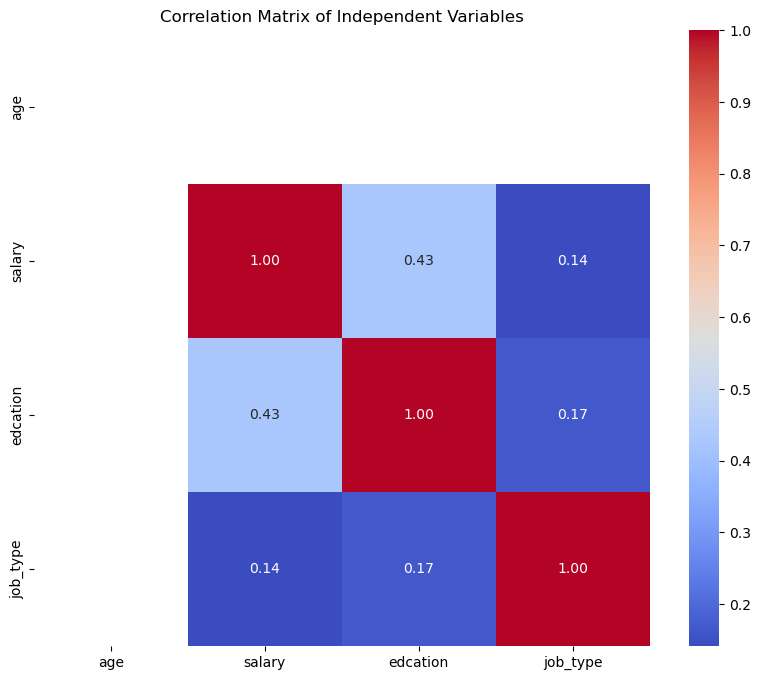

In [71]:
                                    ###Correlation Analysis
### 8. a) Examine correlations between independent variables to identify multicollinearity.

# Assuming df is your DataFrame containing independent variables
# Select independent variables
independent_vars = ['age', 'salary', 'edcation', 'job_type']

# Compute correlation matrix
corr_matrix = df[independent_vars].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

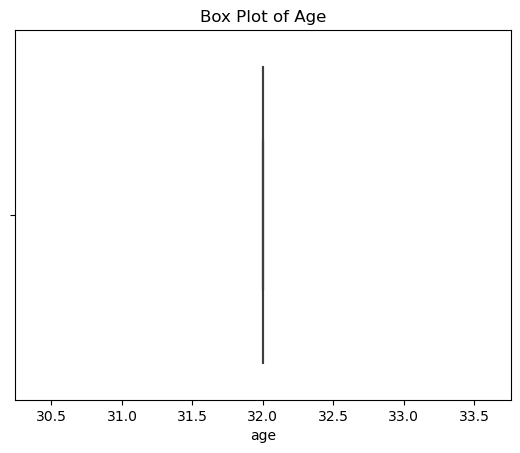

Empty DataFrame
Columns: [customerid, age, salary, balance, marital, targeted, default, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, response, age_group, income_category, job_type, edcation]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [customerid, age, salary, balance, marital, targeted, default, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, response, age_group, income_category, job_type, edcation]
Index: []

[0 rows x 22 columns]


In [75]:
                            #### Outlier Detection and Handling
### 9.a) Identify and rectify outliers that could impact the analysis and predictions.

# Example with a numerical variable 'age'
#plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age')
plt.title('Box Plot of Age')
plt.show()

from scipy import stats

z_scores = stats.zscore(df['age'])
outliers = (z_scores > 3) | (z_scores < -3)
print(df[outliers])
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['age'] < lower_bound) | (df['age'] > upper_bound)
print(df[outliers])
